In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from imagingIO import loopMice, loadData, loadBeh, getBeh
from analysis import dffCalc, filtData, smoothData
from events import getEvents
from trials import markTrials
from bouts import getBouts, getBoutDur, markBouts
from statistics import stdCalc, getBoutMeans, getBoutMax, getStats
from plotter import plotMean, plotHeat, plotTrials

In [2]:
# Start gathering the data from FR1 exp
# Mice
mice = [(8404, 6), (8857, 3), (8864, 1)]
# Parameters
behType = 'FR1'
fs = 0.05
trials=[1,12]

In [3]:
# Get file paths
fileList = loopMice(mice, behType)

# Load the data
dataList = loadData(mice, behType)

# Load the behaviour
eventList = getBeh(mice, fileList['Behaviour'], behType)

# dFF and plot again
filtList = filtData(mice, dffCalc(mice, dataList, lowest=False), cutoff=5.0, order=6)
dFFList = smoothData(mice, filtList, window=4)

In [57]:
# Start running the analysis for Fixed-Ratio
# Baseline before Eat_Start and compare to the eating bout
base = -10.0
duration = 30.0

eventStart = getEvents(mice, eventList, 'Eat_Start', trials)
eventEnd = getEvents(mice, eventList, 'Eat_End', trials)
baseEvent = getEvents(mice, eventList, 'Eat_Start', trials)

boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans(mice, boutsData, behType=behType, trials=trials, base=base, baselining=False)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Ranksum', p_val=0.05)


3  mice were loaded.

Traces were not baselined.
Dunnzo!


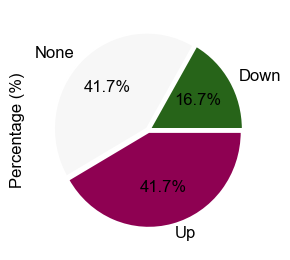

In [60]:
plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif':'Arial', 'weight':'normal', 'size':12}
plt.rc('font', **font)

line = 1.5

fig = plt.figure(figsize=(3,3), facecolor="w", dpi= 150)
ax = plt.subplot(111)
percFR1.T.plot.pie(ax=ax, y='Percentage (%)', autopct='%1.1f%%', explode=[.02,.02,.02], startangle=0, fontsize=12, legend=False, cmap=plt.cm.PiYG_r)
wedges = [patch for patch in ax.patches if isinstance(patch, mpatches.Wedge)]
for w in wedges:
    w.set_linewidth(line)
    w.set_edgecolor('w')
    
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\4_eat_start_up_down_Pie.svg")

In [5]:
statsFR1['Baseline_Mean'] = statsFR1['Baseline_Mean'] - statsFR1['Baseline_Mean'].mean(axis=0)
statsFR1['Bout_Mean'] = statsFR1['Bout_Mean'] - statsFR1['Baseline_Mean'].mean(axis=0)

statsFR1.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\Stats_FR1_Eat_Start.csv")

In [6]:
boutMeansFR1 = getBoutMeans(mice, boutsData, behType=behType, trials=trials, base=base, baselining=False)
meansToPlot = boutMeansFR1.pivot_table(index='Cell', columns='Event', values='Baseline', aggfunc=np.mean)
meansToPlot.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\MeanstoPlot_FR1_Eat_Start.csv")

Dunnzo!


In [9]:
boutMaxFR1 = getBoutMax(mice, boutsData, behType=behType, trials=trials, base=base, baselining=False)
maxToPlot = boutMaxFR1.pivot_table(index='Cell', columns='Event', values='Baseline', aggfunc=np.mean)
maxToPlot.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\MaxtoPlot_FR1_Eat_Start.csv")

Dunnzo!


In [41]:
# Get the cell names
cellNames = boutsData['Cell'].drop_duplicates().values
i=3
cell=cellNames[3]
x=boutsData.pivot_table(index=['Event'], columns=['Cell', 'New_Time'], values='Fluoro')[cell].T.loc[base:0.00].dropna()
for x_ in x:
    print auc(x[x_].index, x[x_].values)

-8.101481935
-23.8219666113
-21.1682523277
-13.287180227
-21.0380370409
-10.064111096
-21.2781508359
-19.9548546048
-18.679099953
-25.2492693475
-18.0477579775
3.87655469735


In [49]:
# Get the cell names
cellNames = boutsData['Cell'].drop_duplicates().values

boutsArea = pd.DataFrame()
for i, cell in enumerate(cellNames):
    x=boutsData.pivot_table(index=['Event'], columns=['Cell', 'New_Time'], values='Fluoro')[cell].T.loc[base:0.00].dropna()
    tempArr = np.zeros([])
    for x_ in x:
        tempArr = np.append(tempArr, auc(x[x_].index, x[x_].values))
    boutsArea = boutsArea.append(pd.DataFrame({cell : tempArr})) 
boutsArea

,M8404_recording_ICs1 (Fluorescence (au)),M8404_recording_ICs11 (Fluorescence (au)),M8404_recording_ICs16 (Fluorescence (au)),M8404_recording_ICs17 (Fluorescence (au)),M8404_recording_ICs19 (Fluorescence (au)),M8404_recording_ICs2 (Fluorescence (au)),M8404_recording_ICs21 (Fluorescence (au)),M8404_recording_ICs22 (Fluorescence (au)),M8404_recording_ICs25 (Fluorescence (au)),M8404_recording_ICs29 (Fluorescence (au)),...,M8857_recording_ICs4 (Fluorescence (au)),M8857_recording_ICs5 (Fluorescence (au)),M8857_recording_ICs6 (Fluorescence (au)),M8857_recording_ICs7 (Fluorescence (au)),M8857_recording_ICs8 (Fluorescence (au)),M8857_recording_ICs9 (Fluorescence (au)),M8864_recording_ICs13 (Fluorescence (au)),M8864_recording_ICs5 (Fluorescence (au)),M8864_recording_ICs7 (Fluorescence (au)),M8864_recording_ICs9 (Fluorescence (au))
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54.336466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-10.170134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-12.596243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48.771457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-11.855124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-12.053509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-10.473776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-13.346435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-11.718722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from sklearn.metrics import auc
#sklearn.metrics.auc(x, y)

# Get the cell names
cellNames = boutsData['Cell'].drop_duplicates().values

# Calculate the bout and baseline means
boutMeans = pd.DataFrame()
for i, cell in enumerate(cellNames):
    boutDF = pd.DataFrame()
    print boutsData.reset_index(drop=True).pivot_table(index=['Event'], columns=['Cell', 'New_Time'], values='Fluoro')[cell].T.loc[base:0.00].values
    boutDF['Baseline'] = x
    y = boutsData.reset_index(drop=True).pivot_table(index=['Event'], columns=['Cell', 'New_Time'], values='Fluoro')[cell].T.loc[0.00:].values
    boutDF['Bout_Mean'] = y
    print len(x), len(y)
    boutDF['Cell'] = cell
    boutDF['Trial'] = boutDF['Baseline'].index.values+1
    #boutDF['Event'] = np.arange(trials[0], trials[1]+1)
    boutMeans = boutMeans.append(boutDF)

[[ 8.86621271 -0.82964742 -1.16249613 ..., -1.17069609 -0.99642499
   1.10630201]
 [ 8.88585321 -0.79289563 -1.15803849 ..., -1.17328268 -0.93789322
   0.99853569]
 [ 8.86706252 -0.7692355  -1.13720545 ..., -1.19064713 -0.86674038
   0.88848966]
 ..., 
 [        nan         nan         nan ..., -1.25126944 -1.03997751
          nan]
 [ 3.07609231 -1.07735359 -0.97326699 ...,         nan         nan
  -0.33640995]
 [ 3.10303919 -1.07991236 -0.97416204 ..., -1.24015552 -1.0455968
  -0.35507388]]


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [61]:
## Start running the analysis for Fixed-Ratio
## Baseline before Eat_Start and compare to after Eat_End
base = -10.0
duration = 30.0

eventStart = getEvents(mice, eventList, 'Eat_End', trials)
eventEnd = getEvents(mice, eventList, 'Eat_End', trials) + 10.0
baseEvent = getEvents(mice, eventList, 'Eat_Start', trials)

boutsData =  getBouts(mice, dFFList, eventStart, eventEnd, baseEvent, base, behType, trials, baselining=False)
boutMeansFR1 = getBoutMeans(mice, boutsData, behType=behType, trials=trials, base=base, baselining=False)

[statsFR1, percFR1] = getStats(boutMeansFR1, choice='Ranksum', p_val=0.05)


3  mice were loaded.

Traces were not baselined.
Dunnzo!


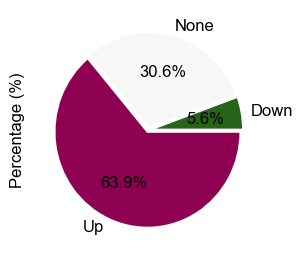

In [62]:
plt.style.use('classic')
# Set the font dictionaries (for plot title and axis titles)
font = {'sans-serif':'Arial', 'weight':'normal', 'size':12}
plt.rc('font', **font)

line = 1.5

fig = plt.figure(figsize=(3,3), facecolor="w", dpi= 150)
ax = plt.subplot(111)
percFR1.T.plot.pie(ax=ax, y='Percentage (%)', autopct='%1.1f%%', explode=[.02,.02,.02], startangle=0, fontsize=12, legend=False, cmap=plt.cm.PiYG_r)
wedges = [patch for patch in ax.patches if isinstance(patch, mpatches.Wedge)]
for w in wedges:
    w.set_linewidth(line)
    w.set_edgecolor('w')
    
fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\4_eat_end_up_down_Pie.svg")

In [51]:
statsFR1['Baseline_Mean'] = statsFR1['Baseline_Mean'] - statsFR1['Baseline_Mean'].mean(axis=0)
statsFR1['Bout_Mean'] = statsFR1['Bout_Mean'] - statsFR1['Baseline_Mean'].mean(axis=0)

statsFR1.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\Stats_FR1_Eat_End.csv")

In [53]:
boutMeansFR1 = getBoutMeans(mice, boutsData, behType=behType, trials=trials, base=base, baselining=False)
meansToPlot = boutMeansFR1.pivot_table(index='Cell', columns='Event', values='Bout_Mean', aggfunc=np.mean)
meansToPlot.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\MeanstoPlot_FR1_Eat_End.csv")

Dunnzo!


In [54]:
boutMaxFR1 = getBoutMax(mice, boutsData, behType=behType, trials=trials, base=base, baselining=False)
maxToPlot = boutMaxFR1.pivot_table(index='Cell', columns='Event', values='Bout_Mean', aggfunc=np.mean)
maxToPlot.to_csv("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\MaxtoPlot_FR1_Eat_End.csv")

Dunnzo!
